<a href="https://colab.research.google.com/github/TranTan1306/BaiTapAI/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [84]:
print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [63]:
# import matplotlib
import matplotlib.pyplot as plt

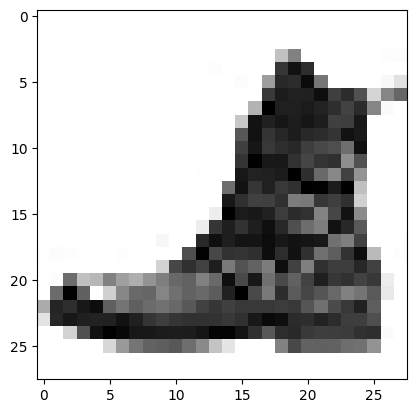

9


In [76]:
plt.imshow(x_train[299], cmap=plt.cm.binary)
plt.show()
print(y_train[299])

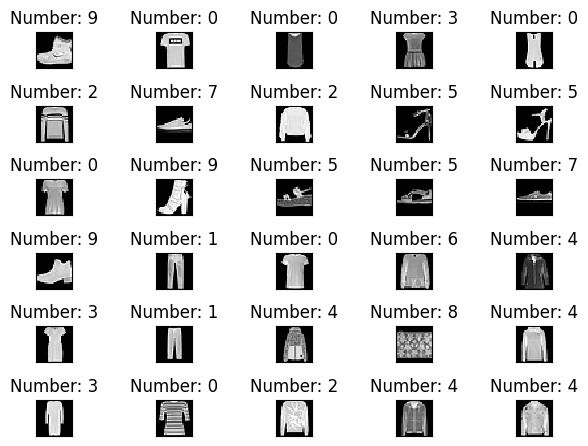

In [78]:
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('Number: {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [85]:
from keras.models import Sequential
from keras.layers import Dense

In [86]:
model = Sequential()
model.add(Dense(5000, activation='relu', input_shape=(28*28,)))
model.add(Dense(3000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 5000)              3925000   
                                                                 
 dense_34 (Dense)            (None, 3000)              15003000  
                                                                 
 dense_35 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_36 (Dense)            (None, 500)               500500    
                                                                 
 dense_37 (Dense)            (None, 10)                5010      
                                                                 
Total params: 22,434,510
Trainable params: 22,434,510
Non-trainable params: 0
_________________________________________________________________


In [87]:
x_train = x_train.reshape(60000, 28*28)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')/255

In [16]:
x_train.shape

(60000, 784)

In [17]:
x_test.shape

(10000, 784)

In [88]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Mat mat:', test_loss)
print('Do chinh xac:', test_acc)

Epoch 1/10
469/469 [==============================] - 335s 714ms/step - loss: 0.7229 - accuracy: 0.7481
Epoch 2/10
469/469 [==============================] - 334s 712ms/step - loss: 0.4166 - accuracy: 0.8468
Epoch 3/10
469/469 [==============================] - 338s 721ms/step - loss: 0.3609 - accuracy: 0.8670
Epoch 4/10
469/469 [==============================] - 331s 706ms/step - loss: 0.3303 - accuracy: 0.8794
Epoch 5/10
469/469 [==============================] - 341s 727ms/step - loss: 0.3063 - accuracy: 0.8871
Epoch 6/10
469/469 [==============================] - 342s 728ms/step - loss: 0.2911 - accuracy: 0.8927
Epoch 7/10
469/469 [==============================] - 336s 717ms/step - loss: 0.2770 - accuracy: 0.8974
Epoch 8/10
469/469 [==============================] - 345s 736ms/step - loss: 0.2683 - accuracy: 0.9006
Epoch 9/10
469/469 [==============================] - 338s 720ms/step - loss: 0.2529 - accuracy: 0.9039
Epoch 10/10
313/313 [==============================] - 16s 50ms/

1/1 [==============================] - 0s 113ms/step


array([0])

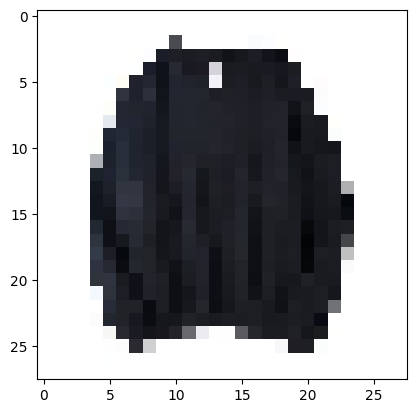

In [92]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import numpy as np
img = load_img('sweater.jpg', target_size=(28,28))
plt.imshow(img)
img = img_to_array(img)
img = img[:,:,0]
img = img.reshape(1,28*28)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)